In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
"""
Purpose: 
- work towards a script that can automate an annotated heatmap for each school's aptitude-interest frequency
- - - Need to create an object that has all of the aptitude and interest fits from YouScience to ensure compatability
<> create an object that contains the POS offerings by school

Discovery:
- Need to clean POS labels: there are typos and inconsistent labels
- Need to clarify matching criteria for how students get placed into a POS
"""

In [7]:
# compiling POS offerings by school
# two objects: (1) offerings by school, (2) overall offerings across RCS
test = pd.read_excel('../YouScienceData/Career Fairs Planning.xlsx', sheet_name=None)
schools = list(test.keys())

In [56]:
RCS_POS_offerings = set()
RCS_POS_per_school = {}
for school in schools:
    # test[school] is a pandas df object
    df = test[school]
    l = []
    # add the POS offerings to a list
    for pos in df.POS.dropna():
        # ignoring the headers for the rest of the spreadsheet
        if ("High School" not in pos) and ("Notes" not in pos):
            l.append(pos)
        else:
            break
    RCS_POS_per_school[school] = l
    RCS_POS_offerings = RCS_POS_offerings.union(set(l))
    

In [57]:
len(RCS_POS_offerings)

52

In [54]:
# 'cul'; 'STEM'; 'Agri'
for pos in list(RCS_POS_offerings):
    if 'STEM' in pos:
        print(pos)

Advanced STEM Applications
STEM: Engineering
STEM Technology
STEM
BioSTEM
STEM Engineering


In [121]:
def YouScienceDemand(YS_data_folder_path):
    # function that reads and preps csv data, then makes a heatmap and saves it folder "Heatmaps"
    def MakeHeatmap(filename):
        df = pd.read_csv(YS_data_folder_path + filename)


    # Create a combined RCS df with all the schools rankings
    # The "School" feature details the school the student attends
    schools = []
    RCS_ranked_df = None
    for filename in os.listdir(YS_data_folder_path):
        if '.csv' in filename:
            # extracting school name to key the data by school 
            l = filename.split('_')
            school = l[-1].split('.')
            schools.append(school[0])
            if RCS_ranked_df is None:
                RCS_ranked_df = pd.read_csv(YS_data_folder_path + filename)
                RCS_ranked_df['School'] = school[0]
            else:
                df = pd.read_csv(YS_data_folder_path + filename)
                df['School'] = school[0]
                RCS_ranked_df = pd.concat([RCS_ranked_df,df], ignore_index=True)
    
    
    #MakeHeatmap(filename)
    return RCS_ranked_df
    

In [122]:
df = YouScienceDemand('../YouScienceData/')
len(df)

<AxesSubplot:>

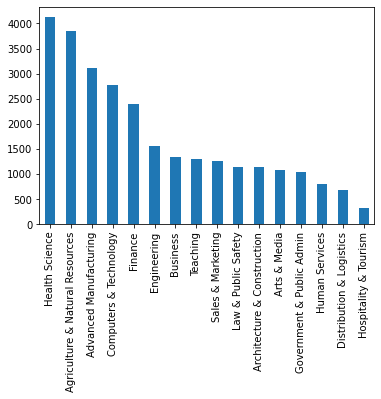

In [125]:
# determine the frequency of the aptitudes/interests and most commonly paired with
# can we create a labelling mechanism from the pairs? 
df.aptitude_fit.value_counts().plot.bar()